## Project 2: Sentiment Analysis on IMDB dataset
<hr>



### Task 1: Defining the project topic, and RNN models (Deadline: 28.1.2022)

For this project we will use the IMDB Dataset of 50K Movie Reviews which Dataset can be found in the link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

I will train a LSTM (Long Short-Term Memory) with the data to elaborate a sentiment Analysis for the classification of emotions (positive and negative) on text data using text analysis techniques.

Afterwards I will compare the results with GRU.

<hr>

### Task 2: Implement the selected model. (Deadline: 11.2.2022)

1. Import all the dependencies

In [1]:
# Import libraries
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

import matplotlib.pyplot as plt

2. Defining Key Values:

In [2]:
# Model configuration
max_sequence_length     = 100
num_distinct_words      = 20000
embedding_output_dims   = 15
loss_function           = 'binary_crossentropy'
optimizer               = 'rmsprop'
additional_metrics      = ['accuracy']
number_of_epochs        = 10
verbosity_mode          = True
validation_split        = 0.20
batch_size              = 16

3. Loading the data:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [3]:
# Loading data
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=num_distinct_words)
print(len(Xtrain), 'train sequences')
print(len(Xtest), 'test sequences')

KeyboardInterrupt: 

4. Data preprocessing:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [ ]:
# Data preprocessing
Xtrain = sequence.pad_sequences(Xtrain, maxlen=max_sequence_length, padding='post')
Xtest  = sequence.pad_sequences(Xtest, maxlen=max_sequence_length, padding='post')
print('Input train shape:', Xtrain.shape)
print('Input test shape:', Xtest.shape)

Input train shape: (25000, 100)
Input test shape: (25000, 100)


In [ ]:
# Decoding review

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in Xtrain[0] ))


cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


5. Building the model:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [ ]:
# Create model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 15)           300000    
                                                                 
 lstm_19 (LSTM)              (None, 64)                20480     
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________


6. Trining the model:

In [ ]:
# Fit model
history = model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=number_of_epochs, 
                    validation_data=[Xtest, ytest], 
                    validation_split=validation_split)

Epoch 1/10
1250/1250 [==============================] - 47s 36ms/step - loss: 0.4669 - accuracy: 0.7688 - val_loss: 0.3744 - val_accuracy: 0.8362
Epoch 2/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.2568 - accuracy: 0.9000 - val_loss: 0.3616 - val_accuracy: 0.8506
Epoch 3/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.1678 - accuracy: 0.9406 - val_loss: 0.4210 - val_accuracy: 0.8434
Epoch 4/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.1127 - accuracy: 0.9616 - val_loss: 0.5062 - val_accuracy: 0.8172
Epoch 5/10
1250/1250 [==============================] - 48s 38ms/step - loss: 0.0733 - accuracy: 0.9764 - val_loss: 0.5246 - val_accuracy: 0.8340
Epoch 6/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.5354 - val_accuracy: 0.8358
Epoch 7/10
1250/1250 [==============================] - 48s 38ms/step - loss: 0.0416 - accuracy: 0.9880 - val_loss: 0.7273 -

7. Evaluating the model

In [ ]:
# Evaluate the model
_, train_acc = model.evaluate(Xtrain, ytrain, verbose = 0)
_, test_acc = model.evaluate (Xtest, ytest, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

Training Accuracy: 0.962, Testing Accuracy: 0.819


8. Plotting results

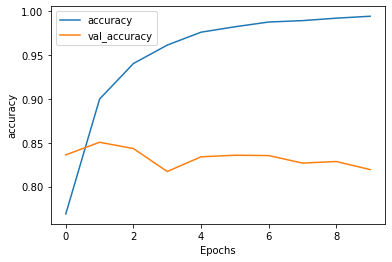

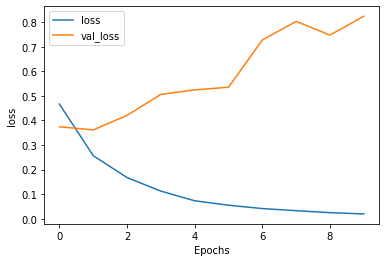

In [ ]:
# Plotting results

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

<hr>

### Task 3.A: Tuning the presented model and describing how and why the results get improvement.


In [ ]:
from keras.layers import Dropout

# Tuning some parameters to try to avoid the overfiting we have seen in the previous setup
number_of_epochs        = 100
batch_size              = 256
optimizer               = 'adam'

# Create model
model_tuned = Sequential()
model_tuned.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))

# Adding dropout to avoid overfitting in training by bypassing randomly selected neurons, thereby reducing the sensitivity to specific weights of the individual neurons
model_tuned.add(LSTM(64, dropout=0.2))
model_tuned.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping
# Define early stopping for early temination that will speed up the process if there is no improvement after 3 epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# Compile the model
model_tuned.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Give a summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 15)           300000    
                                                                 
 lstm_19 (LSTM)              (None, 64)                20480     
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
79/79 [==============================] - 20s 222ms/step - loss: 0.6333 - accuracy: 0.6571 - val_loss: 0.5344 - val_accuracy: 0.7924
Epoch 2/10
79/79 [==============================] - 19s 235ms/step - loss: 0.3963 - accuracy: 0.8382 - val_loss: 0.5776 - val_accuracy: 0.7570
Epoch 3/10
79/79 [==============================] - 18s 228ms/step - loss: 0.2989 - accuracy: 0.8826 - val_loss: 0.4567 - val_accuracy: 0.8050
Epoch 4/10
79/79 [==============================] - 18s 229ms/step - loss: 0.2549 - accuracy: 0.9027 - val_loss: 0.3700 - val_accuracy: 0.8482
Epoch 5/10
79/79 [==============================] - 18s 230ms/step - loss: 0.2164 - accuracy: 0.9186 - val_loss: 0.3778 - val_accuracy: 0.8412
Epoch 6/10
79/79 [==============================] - 18s 231ms/step - loss: 0.1931 - accuracy: 0.9296 - val_loss: 0.3477 - val_accuracy: 0.8504
Epoch 7/10
79/79 [==============================] - 19s 235ms/step - loss: 0.1695 - accuracy: 0.9402 - val_loss: 0.3472 - val_accuracy: 0.8544

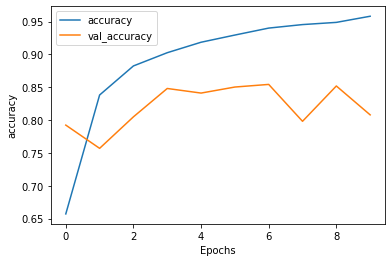

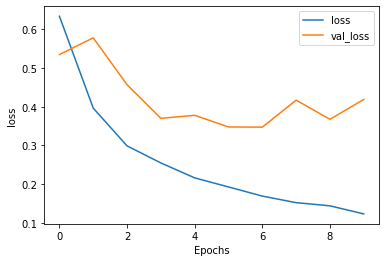

In [ ]:
# Fit model
history_tuned = model_tuned.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=number_of_epochs, 
                    validation_data=[Xtest, ytest], 
                    validation_split=validation_split, 
                    callbacks=[es]
                    )

# evaluate the model
_, train_acc = model_tuned.evaluate(Xtrain, ytrain, verbose=0)
_, test_acc = model_tuned.evaluate(Xtest, ytest, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plot_graphs(history_tuned, "accuracy")
plot_graphs(history_tuned, "loss")                 

We haven't improved the overall accuracy of our model but we have reduced the overfitting

<hr>

### Task 3.B: Comparing your final model with one other RNN model. (Deadline: 25.2.2022)

Comparing the obtained results using a GRU model

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 15)           300000    
                                                                 
 gru_3 (GRU)                 (None, 64)                15360     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 315,425
Trainable params: 315,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
79/79 [==============================] - 28s 292ms/step - loss: 0.6355 - accuracy: 0.6147 - val_loss: 0.4381 - val_accuracy: 0.8072
Epoch 2/10
79/79 [==================

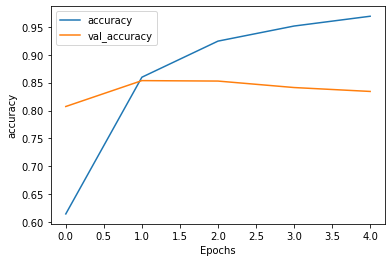

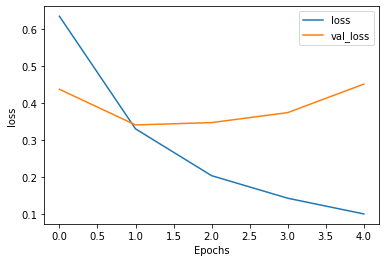

In [ ]:
# Setup a GRU - RNN network
from keras.layers.recurrent import GRU

# Create model
gru_model = Sequential()
gru_model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
gru_model.add(GRU(64))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.summary()

# Compile the model
gru_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history_gru = gru_model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=number_of_epochs, 
                    validation_data=[Xtest, ytest], 
                    validation_split=validation_split, 
                    callbacks=[es]
                    )

# Evaluate the model
_, train_acc = gru_model.evaluate(Xtrain, ytrain, verbose=0)
_, test_acc = gru_model.evaluate(Xtest, ytest, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot training history
plot_graphs(history_gru, "accuracy")
plot_graphs(history_gru, "loss")    